In [9]:
import torch
import numpy as np

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
g = torch.Generator().manual_seed(2147483647)

In [ ]:
# Load the Dataset.
words = open('../assets/names.txt', 'r').read().splitlines()

In [38]:
N = torch.zeros(27, 27, dtype=torch.int32)

In [39]:
chars = sorted(list(set(''.join(words))))

In [40]:
stoi = {c : i for i, c in enumerate(chars)}
stoi['.'] = 26
itos = {i : c for c, i in stoi.items()}

In [41]:
b = {}

for w in words:
    chs = ['.'] + list(w) + ['.']

    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [48]:
p = N[0].float()
p = p / p.sum()

In [51]:
probable_index =  torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[probable_index]

'y'

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

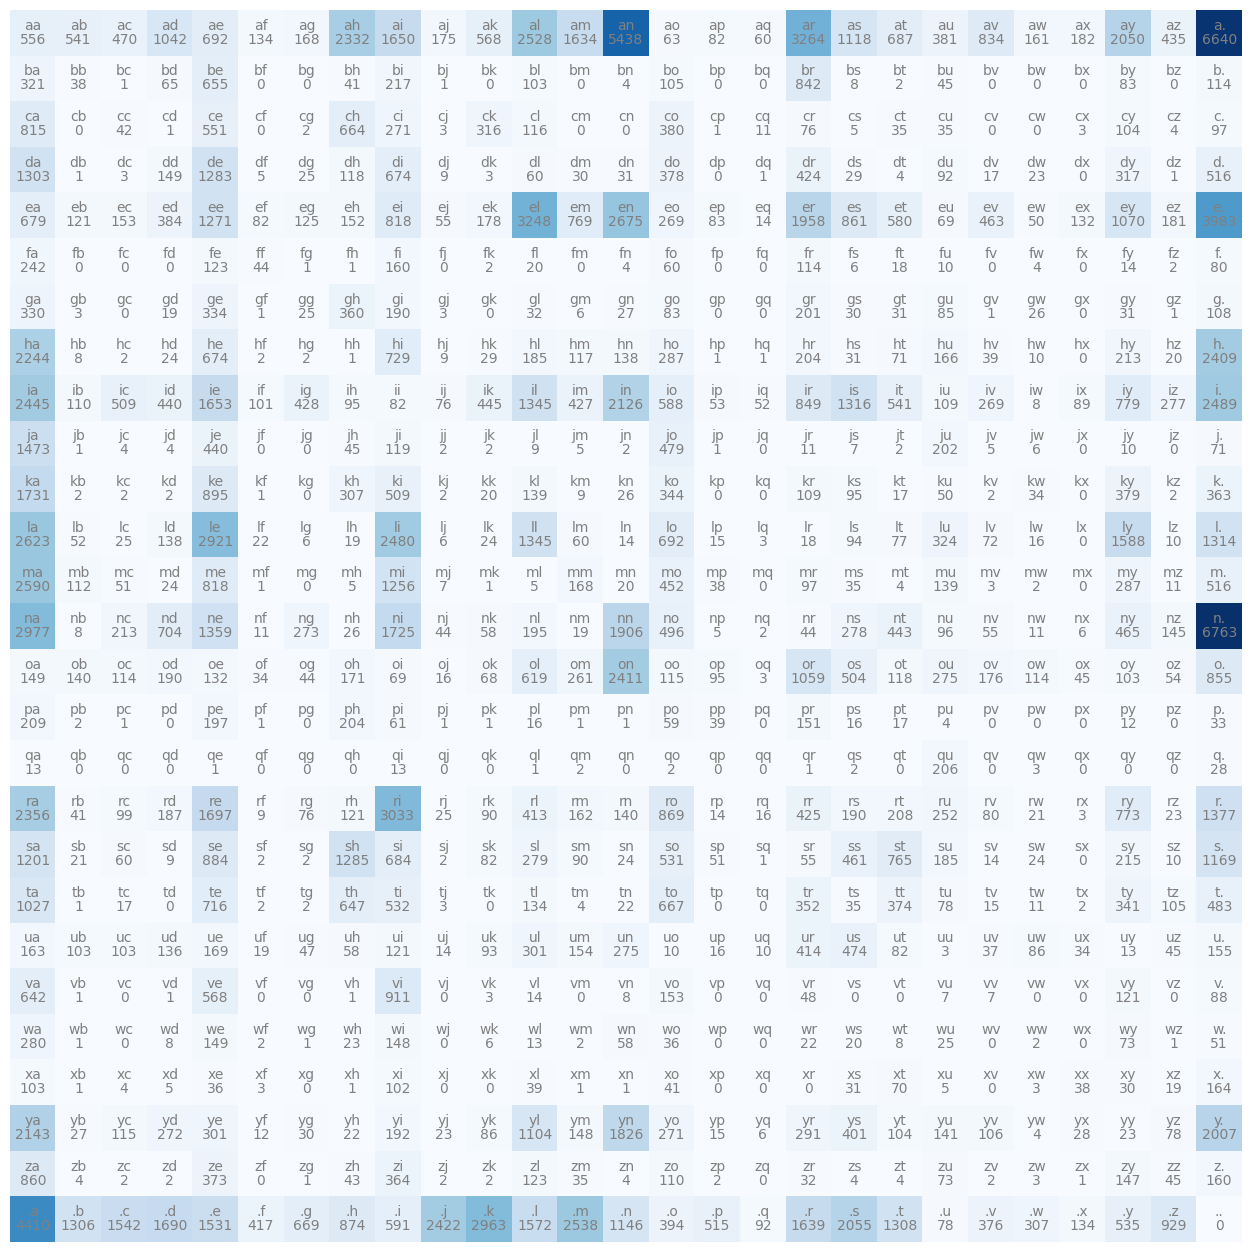

In [42]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chrstr = itos[i] + itos[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, f'{N[i, j]:.0f}', ha='center', va='top', color='gray')

plt.axis('off')

In [57]:
for i in range(10):
    ix = 0

    out = []
    while True:
        if type(ix) is int:
            p = N[ix].float()
            p = p / p.sum()

            ix =  torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

            if type(ix) is int:
                out.append(itos[ix])

            if probable_index == 0:
                break

    print(''.join(out))

n
.
t
.
.
n
.
h
n
r
